Support Vector Machines (SVM) are extremely complex, mathematically intricate classification models that solve classification problems in a very intuitive, easy-to-gasp manner. This is somewhat of a contradiction, I realize. Since this is a Social Media Mining course and not a Machine Learning course, I think it's important for you to be familiar with *what* SVMs are and *what they are doing*, but I won't cover *how they do it*. You will read several papers in this class that use SVMs, and its possible that SVMs might be the best performing model in your final project. Therefore, you should be familiar with the concept. As for the *actual math* behind the model, I highly encourage you to learn it in depth one day because they are extremely interesting, but for the purposes of this course we can take for granted that, given some training data and labels, scikit-learn will perform the mathematical calculations for us. 

SVMs perform *classification* so they are used in situations where the output is a finite set of labels. In its most *basic* form, SVMs perform *binary* classification: they assign an input to one of two categories. SVMs can easily be modified to handle multi-class problems, but we'll cover that later. 

As always, let's turn to the Iris data. We'll use only sepal length and sepal width, and since we're learning basic, binary classification, we'll throw out *I. virginica*. We need a classifier that makes a binary decision: it either *is* *I. Setosa*, or it isn't (which is another way of saying it's *I. versicolor.*

In [1]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

X, y = X[:100, :], y[:100] # Not using virginica

setosa_slength = X[:50, 0]
setosa_swidth = X[:50, 1]
versicolor_slength = X[50:, 0]
versicolor_swidth = X[50:, 1]

Let's pretend for a moment we're centuries away from the world of machine learning. If someone showed you the following picture and asked you to come up with in so-many-words a way to classify the flowers, what would you say?

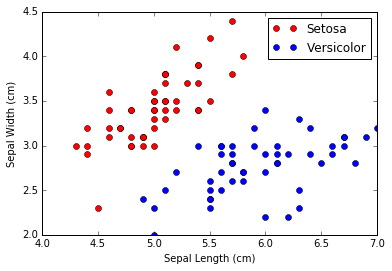

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt

plt.plot(setosa_slength, setosa_swidth, "ro", label="Setosa")
plt.plot(versicolor_slength, versicolor_swidth, "bo", label="Versicolor")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

I think most of you would immediately come up with the idea of simply drawing a line between the red and blue clusters. If anything falls above it, that's setosa, if it falls below it, that's versicolor. Extremely simple idea. 

And that's *basically* all that SVM is. Plain and simple. Here, we have a 2 dimensional feature space - there's sepal length, and there's sepal width, and we can depict them on a flat plot. SVM simply attempts to find a line that separates all the red from all the blue. When a new point comes in, it sees where that point is relation to the line it found. If it's above, it classifies the new unseen point as *I. Setosa*. If it's below, it classifies it as *I. versicolor*. 

Imagine that instead of 2 dimensions, we're using 3: sepal length, sepal width, and petal length. We can visualize these points as a 3-dimensional plot. SVM's goal here is to find a *2 dimensional plane* - like a sheet of paper - that you can slip *between* the two groups. If we had 4 dimensions - which we cannot visualize - SVM tries to find a *3 dimensional hyperplane* that separates the points in 4 dimensional space. If we had 100 features, SVM finds a n-1 = 99 dimensional hyperplane that separates the two categories. My point here is that although we can only visualize 2 and 3 dimensional spaces, nothing stops SVM in principle from trying to find a separating hyperplane in a high-dimensional space.

Let's jump right to it. The beauty of scikit-learn is that although it has a *huge* number of machine learning methods, they all are basically trained using the same interface, which you've already learned. We'll import the SVM factory method, make an instance of an SVM classifier, fit it using the ``fit`` method, and then predict using the ``predict`` method.

This time - for the first time - let's use *all four* of the features per iris to train our classifier. 

Note 1: the factory function for SVMs is called ``SVC``. This confused me when I first learned scikit-learn: it stands for "Support Vector Classifier". There is a such thing as Support Vector Regression - but we won't cover that in this course.

Note 2: I'm passing an argument to the factor function: ``kernel="linear"``. We'll learn what that means soon. 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(3057)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.svm import SVC

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


We trained the SVM on four-dimensional data, and it proceeded to find a 3-dimensional hyperplane that separated *I. Setosa* from *I. Virginica*. Apparently it found a good one, because at least when I run this code (remember, the train-test split is random), I got 100% accuracy on the *unseen* test data.

# Linearly Seperable
In the above example, the points for the two categories formed two pretty distinct blobs on the 2D plane. The mathematical term for this is that the two categories were *linearly seperable*, that you could draw a line to separate them. That's a stroke of luck, though. Often, real world data is far messier. I'm going to call on some scikit-learn data generating functions just to illustrate some examples. First, let's reiterate what exactly SVMs are doing. 

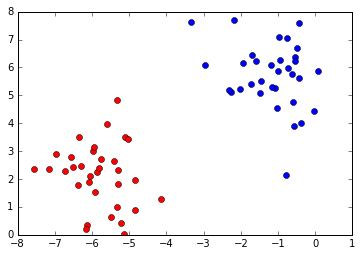

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=99, n_features=2, random_state=1234)
y = y.reshape(-1, 1)
d = np.append(X, y, axis=1)
cat1x = [x[0] for x in d if x[2]==1]
cat1y = [x[1] for x in d if x[2]==1]
cat0x = [x[0] for x in d if x[2]==0]
cat0y = [x[1] for x in d if x[2]==0]
plt.plot(cat0x, cat0y, "ro", cat1x, cat1y, "bo")
plt.show()

SVM finds a line that separates the red blob from the blue blob. But if you think about it, there are an infinite number of lines that you could draw: there are lines at *many* angles that you could draw to cleanly separate these blobs. But SVM finds one line.

What SVM specifically does is:

1. Find the points in each blob that are closest to the other blob. In technical terms, these points are known as the "support vectors".
2. Find *the* line that is **maximially** distant from these support vectors.

In layman terms, it's not just any line that separates that will do. It is the line that produces the "widest gutter" between itself and the two blobs. 

Having clarified this, imagine the line that is made with this set of points:

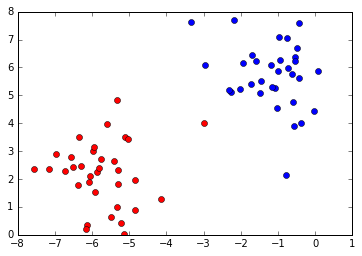

In [5]:
plt.plot(cat0x + [-3], cat0y+[4], "ro", cat1x, cat1y, "bo")

Notice I've added another red point at coordinates $(-3, 4)$. This new red point is an "outlier" of sorts. Now, in order for SVM to find the "best" line, it would have to thread that line between the outlier red point and the blue blob. In other words, the decision boundary would be pushed far closer to the blue blob than the mass of the red blob. This is an excellent example of **overfitting** with SVMs. In order to accomodate for the red outlier the line found by the SVM is pushed far closer to the blue side, while we can see that a line more "in-between" the two masses makes more "intuitive" sense. However, if we put the SVM in the "intuitive" location, we'd have one misclassification: the red point outlier would be on the blue side of the line. 

This is an important tradeoff in SVMs. You can have an extremely strict SVM that accepts **no misclassifications**, but the line it finds may not capture the true dividing line - an as a result, it may generalize poorly. 

You can also have a more "forgiving" SVM that is willing to *accept* some misclassifications in the search for a more generalizable line. 

This tradeoff is quantified in an SVM parameter called ``C``, which stands for "cost". The math is complex, but we can conceptualize ``C`` as representing how much penalty an SVM has to deal with for every point that is on the "wrong" side of the line. The default value for ``C`` is 1.0. Each misclassification penalizes one point, and the SVM algorithm tries to find a line that keeps the cost as low as possible. If you assign ``C`` a very low value, like 0.01, then the SVM will be willing to accept more misclassifications as it finds a line, if you assign ``C`` a very high value, like 1000.0, then the SVM will try as hard as possible to thread a line between the two clusters with as few errors as possible. 

You set a value of ``C`` when you create your classifier using the SVC factory function:

```python
clf = SVM(C=1000.0, kernel="linear") # A very unforgiving SVM
clf = SVM(C=0.0001, kernel="linear") # A very forgiving SVM
```

In the examples I showed above, the data was completely linearly separable. However, the value of ``C`` becomes far more paramount when the data *isn't* linearly separable and so the SVM will *have* to make mistakes. For example:

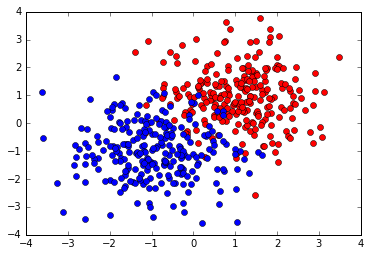

In [6]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=1234, centers=[[1, 1], [-1, -1]])
y = y.reshape(-1, 1)
d = np.append(X, y, axis=1)
cat1x = [x[0] for x in d if x[2]==1]
cat1y = [x[1] for x in d if x[2]==1]
cat0x = [x[0] for x in d if x[2]==0]
cat0y = [x[1] for x in d if x[2]==0]
plt.plot(cat0x, cat0y, "ro", cat1x, cat1y, "bo")
plt.show()

In this case, the SVM classifier will *have* to make a mistake. You'll have to experiment with values of ``C`` to find the optimal line.

And, as always - I'm only using artificial datasets that have only 2 features, and using terms like "blobs" and "line". But you'll often be working with higher-dimensional data where SVM searches for the best separating hyperplane - the same ``C`` parameter applies regardless of feature dimensionality.

# Kernels

## Rexpressing Data in Higher Dimensions

It isn't difficult to imagine a situation that completely defies the concept of linear separability. Take a look at the data below - I got this image [from this page by Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), who has written a great article on what we're discussing right now. 

<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings.png">

We need a classifier that separates the blue dots in the outer ring from the red dots in the inner ring. There is simply no way that this data can be considered linearly seperable. At first glance, it seems that SVMs are just intrinsically ill suited to solve this problem. 

However, there is one interesting approach to fixing this problem: increasing the dimensionality of the data. 

Each point in this data set has two features, its x-value and its y-value. In other words, each data point is represented by a pair of numbers $(x, y)$.

Now, for the sake of discussion, what if we **projected this 2D data into three dimensions**? We need to add a third dimension. I'll skip the math and you'll just have to take my word that re-expressing each data point with *three coordinates* will be particularly useful if we do it like this: $(x, y, x^2 + y^2)$. The new coordinate in the third dimension is the sum of the the first coordinate squared and the second coordinate squared. Now we can plot the result in 3-dimensions:

<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings_sep.png">

Notice that in *re-expressing* the data in *higher-dimensions* following a specified formula, we have transformed data that is **not** linearly seperable in **2 dimensions** to data that **is** linearly seperable in **3 dimensions**.

Remember that when an SVM is dealing with $n$ dimensions, it's trying to find an $n-1$ hyperplane that separates the data. In the re-expressed data, we're dealing with 3 dimensions, so the SVM is trying to find a 3-1=2 dimensional hyperplane to separate the data: and a 2 dimensional hyperplane is just a plane. Looking at the right image, you can see that you could easily insert a "sheet of paper" between the re-expressed blue and red groups. This is exactly what an SVM would do in this situation. 

We can actually back-transform the hyperplane onto the original 2-dimensional plot:

<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings_back.png">

Note that the plane the SVM found in 3 dimensions is a circle in the original dimensionality. Increasing the dimensionality of the data is a form of **adding non-linearity to SVMs**. 

## Enter the Kernel

It seemed pretty cheap that I somehow "knew" that the 3rd dimension should be $x^2 + y^2$. In fact, I only knew that because I read Eric Kim's blog post. Given a dataset with dimensionality $n$, how do we express the higher dimensions? And how do we even know how many dimensions we need? If 3 didn't work, should we try 4? 10? 100? Even if we did know how to re-express the data, this very quickly becomes computationally expensive. 

Fortunately for us, this issue has been extensively researched and is now addressed by something known as **the kernel trick**. Going into all the details behind the kernel trick is beyond the scope of this course (but [Eric's blog post is a fantastic introduction to the idea](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)), but for our purposes all you need to know is that there are a set of kernels that have become "standardized" in that they work well in many situations. Kernels address the problems I mentioned above: they increase the dimensionality of the data and they do so in a computationally cheap way.  The ones that scikit-learn offers are the *radial basis function* kernel and the *polynomial kernel*.

This, of course, means that there's a new hyperparameter that we have to designate when initializing an SVM. 

```python
clf = SVC(kernel="linear") # The "standard" SVM. 
clf = SVC(kernel="rbf") # Radial basis function SVM
clf = SVC(kernel="poly", degree=2) # 2 degree polynomial 
```

The RBF function has been so effective in various classification tasks that it is the default kernel in scikit-learn, which is why I explicitly designated ``kernel="linear"`` in my example above. Also note that the polynomial kernel adds *yet another* hyperparameter, the degree of the polynomial. It takes an integer value greater than 1.

Since we can't delve into the math here, as a general rule, I'd recommend starting with a linear kernel, and then if you don't get good results, consider that your data may not be linearly seperable and try the rbf kernel. 

# Multi-class classification 

So far, we've been dealing with SVMs that distinguish two categories only. However, it's easy to handle more than two. 

Scikit-learn promotes an SVM to multi-class problems through something known as the **one-vs-one** scheme. The idea is simple. Let's say we have three classes: A, B, and C. Then we simply train multiple SVMs: A vs. B, A vs. C, and B vs. C. When a new data point comes in, see what all 3 classifiers predict and choose the one that has the greatest margin; that is, choose the one where the point is "furthest away" from the decision boundary. 

Note that if you have $n$ output classes, then the one-vs-one scheme will train $\frac{n(n-1)}{2}$ separate classifiers. Just note that if you have a huge number of classes, this will become computationally expensive to compute. 

Scikit-learn's SVM functionalities automatically handle multi-class problems. If it notices there are more than two categories in your label vector ``y``, it adjusts accordingly.

# Visualizing Kernels

Here is a helpful visualization of the decision boundaries discovered by a multi-class SVM on the Iris data using different kernels. In the case of the ``rbf`` and ``poly`` kernels, remember that in these instances the data was re-expressed in higher dimensions, so the decision boundaries you see are the ones that are projected back into two dimensions. As we saw above, this allows non-linear boundaries, which is why the decision boundaries are curved in those instances.

The upper right visualization of "LinearSVC (Linear Kernel)" simply refers to a second implementation of linear SVMs that scikit-learn has. It's unlikely in this course that we'll encounter data where the difference between ``SVC(kernel="linear")`` and ``LinearSVC`` will be significant. If you're curious about the distinction, you can read up on it at scikit-learn's documentation.


<img src="http://ella.ils.indiana.edu/~vmalic/z639/kernels.png">